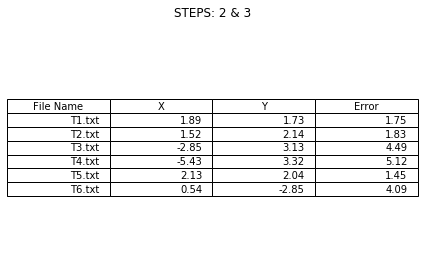

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit

A = [0,0]
B = [3.27,0]
C = [1.035,4.367]
n = 2.007
C_const = -61.783

df_array = []
for x in range(6):
    df_array.append(pd.read_csv('./data/T{}.csv'.format(x+1), header=None))

anchor_rssi_avgs = []
for df in df_array:
    t_temp = []
    t_temp.append(df[df[1].str.contains('A:')][2].mean())
    t_temp.append(df[df[1].str.contains('B:')][2].mean())
    t_temp.append(df[df[1].str.contains('C:')][2].mean())
    anchor_rssi_avgs.append(t_temp)

def dist(rssi):
    return np.power(10, (C_const - rssi)/(10*n))

anchor_dist_avgs = []
for rssis in anchor_rssi_avgs:
    r_temp = []
    r_temp.append(dist(rssis[0]))
    r_temp.append(dist(rssis[1]))
    r_temp.append(dist(rssis[2]))
    anchor_dist_avgs.append(r_temp)

est_dist_array = []
p = B[0]
q = C[0]
r = C[1]
for dists in anchor_dist_avgs:
    e = dists[0]
    f = dists[1]
    g = dists[2]
    x = (e**2 - f**2 + p**2)/(2*p)
    y = ((e**2 - g**2 + q**2 + r**2)/(2*r)) - (q/r)*x
    est_dist_array.append([np.round(x,2),np.round(y,2)])


real_coords = [[1.635, 0], [3.27, 1.595], [1.635, 2.99], [-0.61, 1.595],[3.22, 2.99], [0.02, 1.205]]
i = 0
for coord in est_dist_array:
    error = np.sqrt(((coord[0] - real_coords[i][0])**2) + ((coord[1] - real_coords[i][1])**2))
    coord.append(np.round(error,2))
    coord.insert(0, 'T{}.txt'.format(i+1))
    i += 1

cols = ('File Name', 'X', 'Y', 'Error')
rows = ['T%d.txt' % x for x in (1,2,3,4,5,6)]

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
plt.title('STEPS: 2 & 3')
ax.table(cellText=est_dist_array, colLabels=cols, loc='center')
fig.tight_layout()
plt.show()


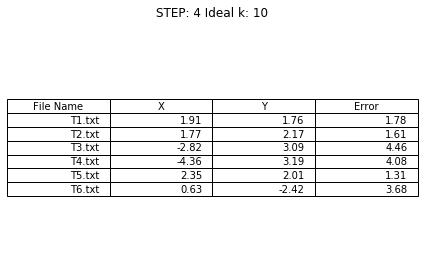

In [85]:
A = [0,0]
B = [3.27,0]
C = [1.035,4.367]
n = 2.007
C_const = -61.783

df_array = []
for x in range(6):
    df_array.append(pd.read_csv('./data/T{}.csv'.format(x+1), header=None))

move_avg_vals = []
for k in range(10):
    anchor_rssi_avgs = []
    for df in df_array:
        t_temp = []
        t_temp.append((df[df[1].str.contains('A:')][2].rolling(k+1, min_periods=1).mean()).mean())
        t_temp.append((df[df[1].str.contains('B:')][2].rolling(k+1, min_periods=1).mean()).mean())
        t_temp.append((df[df[1].str.contains('C:')][2].rolling(k+1, min_periods=1).mean()).mean())
        anchor_rssi_avgs.append(t_temp)
    move_avg_vals.append(anchor_rssi_avgs)

def dist(rssi):
    return np.power(10, (C_const - rssi)/(10*n))

anchor_dist_avgs_groups = []
for group in move_avg_vals:
    anchor_dist_avgs = []
    for rssis in group:
        r_temp = []
        r_temp.append(dist(rssis[0]))
        r_temp.append(dist(rssis[1]))
        r_temp.append(dist(rssis[2]))
        anchor_dist_avgs.append(r_temp)
    anchor_dist_avgs_groups.append(anchor_dist_avgs)


p = B[0]
q = C[0]
r = C[1]
total_dist_groups = []
for dist_group in anchor_dist_avgs_groups:
    est_dist_array = []
    for dists in dist_group:
        e = dists[0]
        f = dists[1]
        g = dists[2]
        x = (e**2 - f**2 + p**2)/(2*p)
        y = ((e**2 - g**2 + q**2 + r**2)/(2*r)) - (q/r)*x
        est_dist_array.append([np.round(x,2),np.round(y,2)])
    total_dist_groups.append(est_dist_array)


real_coords = [[1.635, 0], [3.27, 1.595], [1.635, 2.99], [-0.61, 1.595],[3.22, 2.99], [0.02, 1.205]]

for group in total_dist_groups:
    i = 0
    for coord in group:
        error = np.sqrt(((coord[0] - real_coords[i][0])**2) + ((coord[1] - real_coords[i][1])**2))
        coord.append(np.round(error,2))
        coord.insert(0, 'T{}.txt'.format(i+1))
        i += 1

k = 0
greatest = 1000
greatest_index = 0
index = 0
for grp in total_dist_groups:
    error_sum = 0
    count = 0
    for val in grp:
        error_sum += val[3]
        count += 1
    if (error_sum/count < greatest):
        greatest = error_sum/count
        greatest_index = index
    index += 1

cols = ('File Name', 'X', 'Y', 'Error')
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
plt.title('STEP: 4 Ideal k: {}'.format(greatest_index+1))
ax.table(cellText=total_dist_groups[greatest_index], colLabels=cols, loc='center')
fig.tight_layout()
plt.show()